In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh

In [3]:
X, y = make_classification(n_features=2, n_samples=100, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
# X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
# X, y = make_moons(noise=0.3, random_state=0)
rng = np.random.RandomState(12)
X += 2 * rng.uniform(size=X.shape)

In [4]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [5]:
clf=GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [6]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

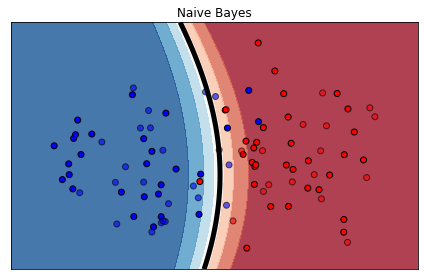

In [7]:
fig, ax = plt.subplots()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.contour(xx, yy, Z, [0.5], linewidths=5, colors='k')
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Naive Bayes")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, clf_pred)
print("Accuracy %f" %  clf_acc)
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

Accuracy 0.925000
[[18  0]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.86      0.93        22

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.93        40

